CNN and Data Augmentation
====

Image Preprocessing by Tensorflow
---------

W0725 16:45:40.495820  7676 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


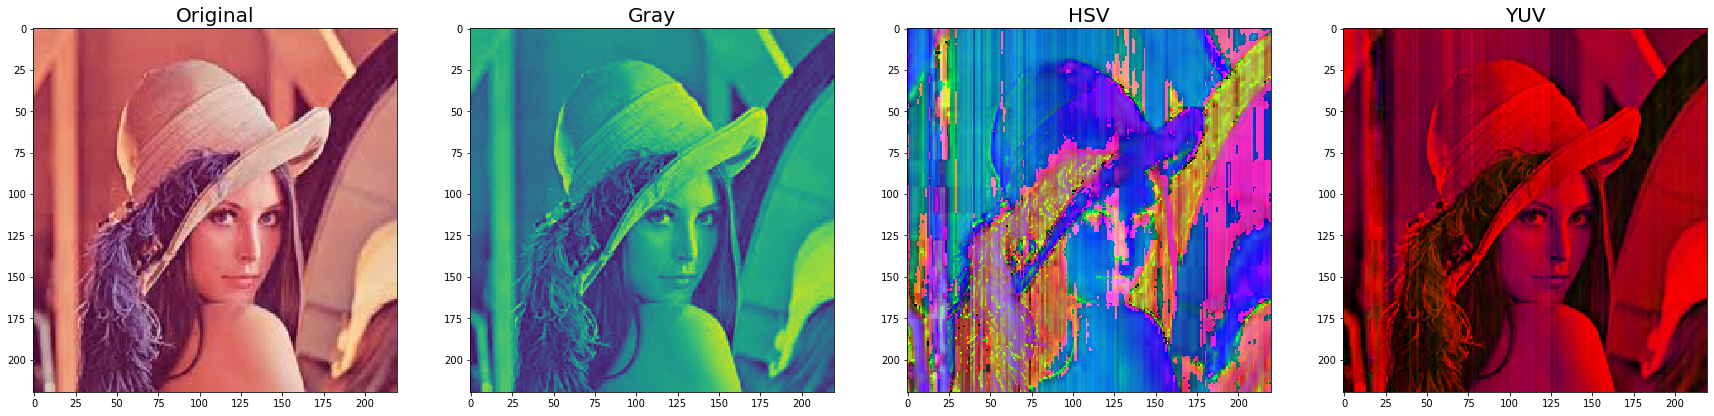

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import warnings 

warnings.filterwarnings('ignore')

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

# image preprocessing
img = np.array(Image.open('pictures/lenna.png'))

gray = tf.image.rgb_to_grayscale(img)
gray = np.squeeze(gray) # 채널이 1개이기 때문에 지워줌

hsv = np.float32(img)
hsv = MinMaxScaler(hsv)
hsv = tf.image.rgb_to_hsv(hsv)

yuv = np.float32(img)
yuv = MinMaxScaler(yuv)
yuv = tf.image.rgb_to_yuv(yuv)

data_prep_dict = {'Original' : img, 'Gray' : gray, 'HSV' : hsv, 'YUV' : yuv}

plt.figure(figsize=(30,15))
for i in range(0,4):
    plt.subplot(str(14) + str(i+1))
    key = list(data_prep_dict.keys())[i]
    plt.title(key, fontsize=20)
    plt.imshow(data_prep_dict[key])

Data Augmentation
----------

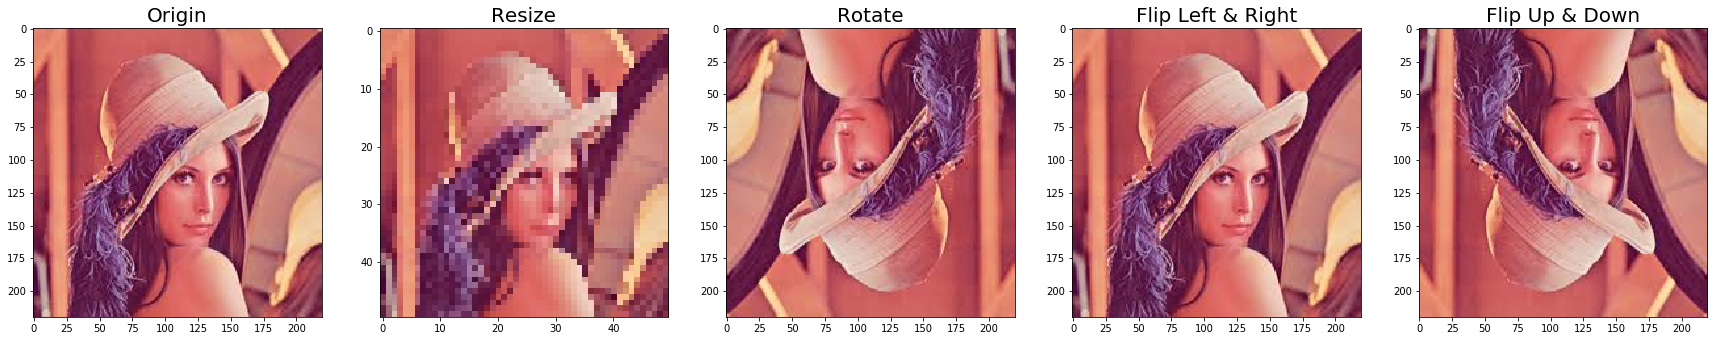

In [72]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
    
# 원본 이미지 불러오기
img = np.array(Image.open('pictures/lenna.png'))
resize = tf.image.resize(img / 255., [50,50])
rotate = tf.image.rot90(img, 2)
flip_LR = tf.image.random_flip_left_right(img)
flip_UD = tf.image.random_flip_up_down(img, 2019)

data_aug_dict = {'Origin' : img, 'Resize' : resize, 'Rotate' : rotate, 'Flip Left & Right' : flip_LR, 'Flip Up & Down' : flip_UD,
                'HUE' : hue, 'SATURATION' : saturation, 'BRIGHTNESS' : brightness, 'CONTRAST' : contrast, 'Random Crop' : random_crop}

plt.figure(figsize=(30, 15))
for i in range(0, 5):
    plt.subplot(str(15) + str(i+1))
    key = list(data_aug_dict.keys())[i]
    plt.title(key, fontsize=20)
    plt.imshow(data_aug_dict[key])

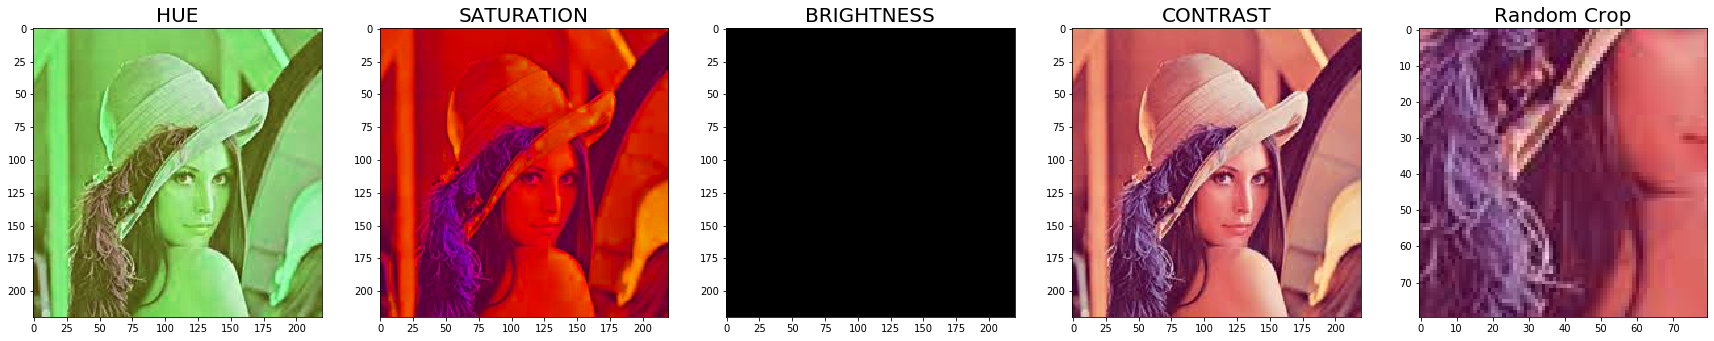

In [71]:
hue = tf.image.random_hue(img, 0.3)
saturation = tf.image.random_saturation(img, 10.0, 20.0)
brightness = tf.image.random_brightness(img, 20.0)
contrast = tf.image.random_contrast(img, 0.7, 1.3)
random_crop = tf.image.random_crop(img, [80, 80, 3])

plt.figure(figsize=(30, 15))
for i in range(5, 10):
    plt.subplot(str(15) + str(i-4))
    key = list(data_aug_dict.keys())[i]
    plt.title(key, fontsize=20)
    plt.imshow(data_aug_dict[key])

Convolution Layer
-------------

Image shape :  (1, 3, 3, 1)
Kernel shape :  (2, 2, 1, 1)


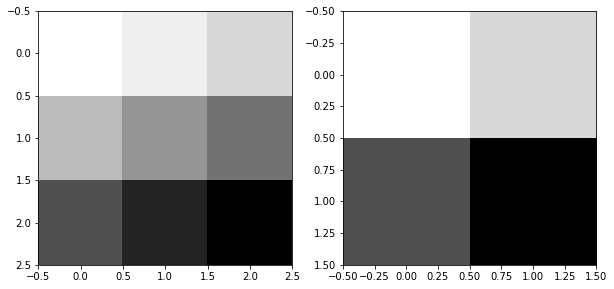

In [87]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

def Visualize(image, x, y):
    plt.imshow(image.reshape(x,y), cmap ='Greys')
    plt.savefig('plot.png')
    

# 임의의 3 x 3 x 1 영상을 하나 만들어줍니다.
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype = np.float32)

# 합성곱 연산을 위해 임의의 2 x 2 x 1 커널을 하나 만들어줍니다.
kernel = np.array([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])


# 이미지 Shape 출력 : (num of image, width, height, channel)
print('Image shape : ', image.shape)
# 커널 Shape 출력 : (width, height, channel, num of kernel)
print('Kernel shape : ', kernel.shape)
# tf.nn.conv2d에 넣기 위해 이미지와 커널의 Shape을 위와 같이 만들었습니다.

kernel_init = tf.constant_initializer(kernel)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID',kernel_initializer=kernel_init)(image)

fig, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(image.reshape(3,3), cmap = 'Greys')
ax[1].imshow(conv2d.numpy().reshape(2,2), cmap = 'Greys')

Max Pooling Layer
---------

(1, 2, 2, 1)
[[[[ 5.]
   [ 7.]]

  [[ 8.]
   [10.]]]]


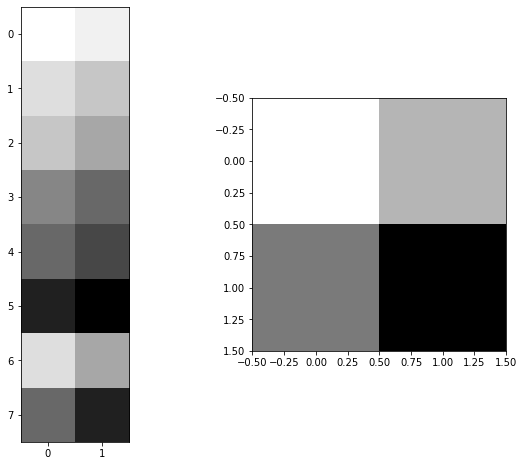

In [97]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
    
# 임의의 3 x 3 x 1 image
image = tf.constant([[[[1],[2],[3],[4]],
                   [[4],[5],[6],[7]],
                   [[7],[8],[9],[10]],
                   [[3],[5],[7],[9]]]], dtype = np.float32)

pool = keras.layers.MaxPool2D(pool_size = (2,2), strides=2, padding='VALID')(image)

print(pool.shape)
print(pool.numpy())

fig, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.reshape(image,(8,2)), cmap = 'Greys')
ax[1].imshow(pool.numpy().reshape(2,2), cmap = 'Greys')

CNN by Keras
---------

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

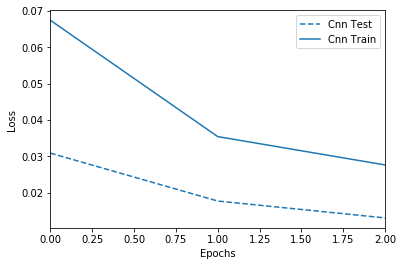

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

def Visulaize(histories, key='loss'):
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Test')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])    
    plt.savefig("plot.png")
    

# MNIST 데이터 세트를 불러옵니다.
mnist = keras.datasets.mnist

# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

# MNIST 데이터 이미지를 0~1사이 값으로 정규화해줍니다.
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# 입력 Shape을 맞춰주기 위해 맨 끝에 1차원 Dimension을 하나 추가해줍니다.
# [Num of data, Width, Height] ---->> [Num of data, Width, Height, Channel]
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# 0 ~ 9 사이 값인 Label을 클래스화 하기 위해 One-Hot Encoding을 진행합니다.
# ex 1 ---> [0,0,0,0,0,0,0,0,0,1], 2 ----> [0,0,0,0,0,0,0,0,1,0] ...
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

# CNN 모델을 만들어줍니다.
def CNN():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=16, kernel_size=3, activation=tf.nn.relu, padding='SAME', 
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=16, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=16, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10))
    return model

# model에 CNN 모델을 넣고 모델이 어떻게 생겼는지 확인해보세요..
model = CNN()
model.summary()

# 모델을 학습할 방법과 Error 계산 방법, 평가 방법을 설정합니다.
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

# 모델을 학습시켜줍니다.
# verbose의 값에 따라 출력 형태를 바꿀 수 있습니다.
# 0 : silent, 1 : progress bar, 2 : one line per epoch
history = model.fit(train_images, train_labels, epochs = 3, batch_size = 500, validation_data = (test_images, test_labels), verbose = 2)

# 테스트 데이터로 모델을 검증합니다.
loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
print('Test Data로 예측한 클래스 : ',model.predict_classes(test_images))

# loss와 accuracy를 시각화할 수 있습니다.
Visulaize([('CNN', history)], 'loss')

Data Augmentation + CNN
-------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import random
# from elice_utils import EliceUtils
# elice_utils = EliceUtils()

# MNIST 데이터를 불러옵니다.
mnist = np.load('./datasets/mnist.npz')

# TODO : Train Data와 Test Data로 분리해보세요.
# 데이터의 개수는 Train 100개, Test 20개로 분리합니다.
X_train, X_test, y_train, y_test = mnist['x_train'][:100], mnist['x_test'][100:120], mnist['y_train'][:100], mnist['y_test'][100:120]

# TODO : Train Data의 Pixel 값을 0 ~ 255에서 0 ~ 1 사이의 Float 데이터로 바꿔보세요.
X_train = X_train / 255.0
X_test = X_test / 255.0

# TODO : (num of data, 28, 28) 형태의 데이터를 (num of data, 28, 28, 1)로 만들어보세요. 
X_train = tf.reshape(X_train, [100, 28, 28, 1])
X_test = tf.reshape(X_test, [20, 28, 28, 1])

# Data Augmenation을 위한 메서드입니다.
def data_augmentation(image, label):
    rotate_img = []
    rotate_label = []
    flip_img = []
    flip_label = []
    
    print('Doing image argumentation...\n')
    for x, y in zip(image, label):
        # TODO : 입력 영상을 Rotate 해보세요. 단 Rotate 각도는 Random으로 설정해주세요.
        rotate_img.append(tf.image.rot90(x, random.randint(0,4)))
        rotate_label.append(y)
        
        # TODO : 입력 영상을 좌우반전해보세요.
        flip_img.append(tf.image.random_flip_left_right(x))
        flip_label.append(y)
        
    aug_img = np.array(rotate_img + flip_img)
    aug_label = np.array(rotate_label + flip_label)
    print('Image argumentation DONE...\n')
    
    return aug_img, aug_label
    
# TODO : Augmenation을 거친 데이터를 저장해주세요.
aug_X_train, aug_y_train = data_augmentation(X_train, y_train)

print('Doing Concatenate...\n')
X_train = np.concatenate((X_train,aug_X_train))
y_train = np.concatenate((y_train,aug_y_train))

# TODO : 0 ~ 9값을 가진 Data Label을 One Hot encoding 해주세요
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# TODO : CNN 모델을 만들어보세요.
def CNN():
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(32, (2, 2), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(16, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

# 모델이 어떻게 생겼는지 확인해보세요..
model = CNN()
model.summary()

# TODO : 모델을 학습할 방법과 Error 계산 방법, 평가 방법을 설정해보세요.
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

# TODO : 모델을 학습시켜보세요..
# verbose의 값에 따라 출력 형태를 바꿀 수 있습니다.
# 0 : silent, 1 : progress bar, 2 : one line per epoch
history = model.fit(X_train, y_train, epochs=20, batch_size = 500, validation_data=(X_test, y_test), verbose = 2)

# TODO : Test Data로 모델을 검증해보세요.
loss, test_acc = model.evaluate()

# 결과를 보고 분석해보세요.
print('Test Loss : {:.4f} | Test Accuracy : {}'.format(loss, np.round(test_acc,3)))
print('Test Data로 예측한 클래스 : ',model.predict_classes(X_test))
print('Test Data의 실제 클래스   : ',[np.argmax(i) for i in y_test])